<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section8)<br>
7. [**Building a model**](#Section7)<br>
8. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

Company Introduction

Your client for this project is a major Avocado Producer.

- Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.


Current Scenario
Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.



---
<a name = Section2></a>
# **2. Problem Statement**
---

- This section is emphasised on providing some generic introduction to the problem that most companies confronts.

- **Problem Statement:**

- The current process suffers from the following problems:

- The price of avocado is dependent on global demands and seasonal production.
Due to these reasons, it is quite difficult to know for certain the price in the future.

- The company has hired you as data science consultants. They want to automate the process of predicting the future price of avocado, based on the historical data.


Your Role

- You are given a dataset containing the weekly retail scan data of avocadoes.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
#!pip install -q datascience                                         # Package that is required by pandas profiling
#!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01|Id| Unique identity of each observation| 
|02|Date| The date of the observation.| 
|03|AveragePrice| The average price of a single avocado.| 
|04|Total Volume| Total number of avocados sold.|
|05|4046| Total number of avocados with PLU 4046 sold.|
|06|4225| Total number of avocados with PLU 4225 sold.|
|07|4770| Total number of avocados with PLU 4770 sold.|
|08|Total Bags| Total number of bags sold.| 
|09|AveragePrice| The average price of a single avocado.| 
|10|Small Bags| Total number of small bags sold.|
|11|Large Bags| Total number of large bags sold.|
|12|sugarpercent| Type of an avocado (conventional or organic).|
|13|type| TTotal number of Xtra large bags sold.|
|14|year| The year of observation.|
|15|Region| The city or region of the observation.|


In [2]:
#Loading CSV file

train_data = pd.read_csv('C:/Users/zoher/Desktop/Term 5/Project/AVACADO PRICE PREDICTION/avocado_train.csv')


In [3]:
train_data.head(10)

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.00,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.00,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.00,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.00,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.00,organic,2016,Atlanta
5,7994,2017-02-19,1.14,331446.60,150107.10,76620.67,2862.33,101856.50,78346.11,22320.39,1190.00,conventional,2017,SouthCarolina
6,6904,2017-09-17,1.84,409206.24,278164.17,53156.30,50.37,77835.40,16642.51,61152.89,40.00,conventional,2017,MiamiFtLauderdale
7,3235,2016-10-16,1.80,523682.50,52200.02,324240.53,75841.97,71399.98,61522.13,1047.85,8830.00,conventional,2016,Chicago
8,522,2015-12-20,1.03,117393.22,57557.75,23198.49,16370.50,20266.48,11760.83,4248.29,4257.36,conventional,2015,Columbus
9,944,2015-11-08,0.75,983909.85,427828.16,411365.91,20404.29,124311.49,56573.89,67737.60,0.00,conventional,2015,Houston


In [4]:
train_data['AveragePrice'].max()

3.25

In [5]:
train_data['AveragePrice'].min()

0.44

In [6]:
train_data['Id'].nunique()

14599

In [7]:
train_data.shape

(14599, 14)

In [8]:
train_data["Date"] = pd.to_datetime(train_data["Date"])

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [9]:
train_data.describe()                                       

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### **Data Information**

In [10]:
train_data.info()                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            14599 non-null  int64         
 1   Date          14599 non-null  datetime64[ns]
 2   AveragePrice  14599 non-null  float64       
 3   Total Volume  14599 non-null  float64       
 4   4046          14599 non-null  float64       
 5   4225          14599 non-null  float64       
 6   4770          14599 non-null  float64       
 7   Total Bags    14599 non-null  float64       
 8   Small Bags    14599 non-null  float64       
 9   Large Bags    14599 non-null  float64       
 10  XLarge Bags   14599 non-null  float64       
 11  type          14599 non-null  object        
 12  year          14599 non-null  int64         
 13  region        14599 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.6+ MB


In [11]:
train_data.isnull().sum()

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
train_data.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

**Observation:**
- There are no missing values in the dataset.
- There are 11 variables with numeric values.
- There are 14599 records with 14 columns in the dataset.
- Date variable is object and need to convert to datetime.
- Id is the unique variable.
- There are 54 region in the dataset.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [13]:
# profile = ProfileReport(df = data)
# profile.to_file(outputfile = 'Pre Profiling Report.html')
# print('Accomplished!')

In [14]:
# Insert your code here...

---
<a name = Section8></a>
# **6. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

In [15]:
#Understanding the entire train data using a pair plot
    

**Which type of Avocados are more in demand?**

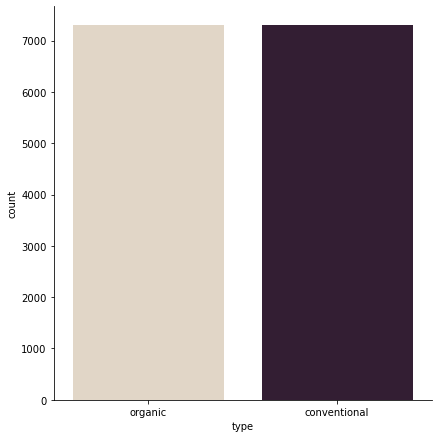

In [16]:
sns.catplot(x="type", kind="count", palette="ch:.25",data=train_data, height=6)

In [17]:
train_data["type"].value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

Both type of Avocado are in equal demand.

**Year of observation**

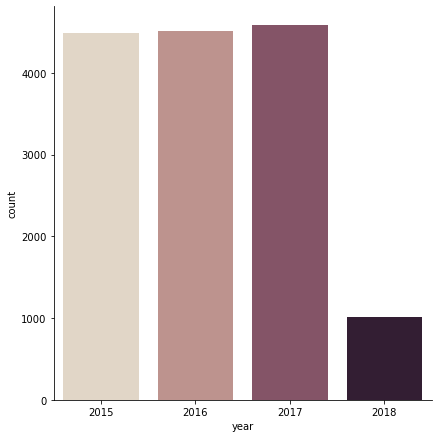

In [18]:
sns.catplot(x="year", kind="count", palette="ch:.25",data=train_data, height=6)

In [19]:
train_data["year"].value_counts()

2017    4585
2016    4509
2015    4487
2018    1018
Name: year, dtype: int64

2017 records the highest and 2018 is the lowest

**In which range Average price lies?**

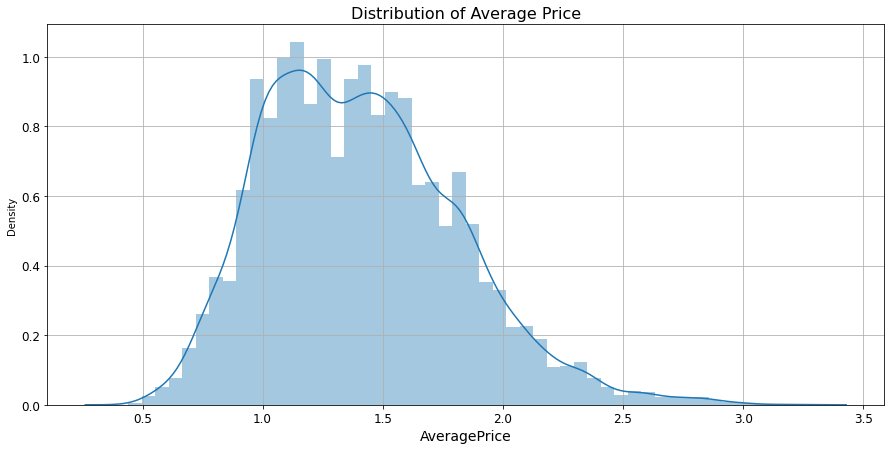

In [20]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=train_data['AveragePrice'], kde=True)

# Add some cosmetics
plt.title(label='Distribution of Average Price', size=16)
plt.xlabel(xlabel='AveragePrice', size=14)
##plt.ylabel(ylabel='gender', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

# Display the plot
plt.show()

Average Price distribution shows that for most cases price of avocado is between 1.2, 1.4.


**Average Price distribution based on region.**

In [21]:
train_data['region'].nunique()

54

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

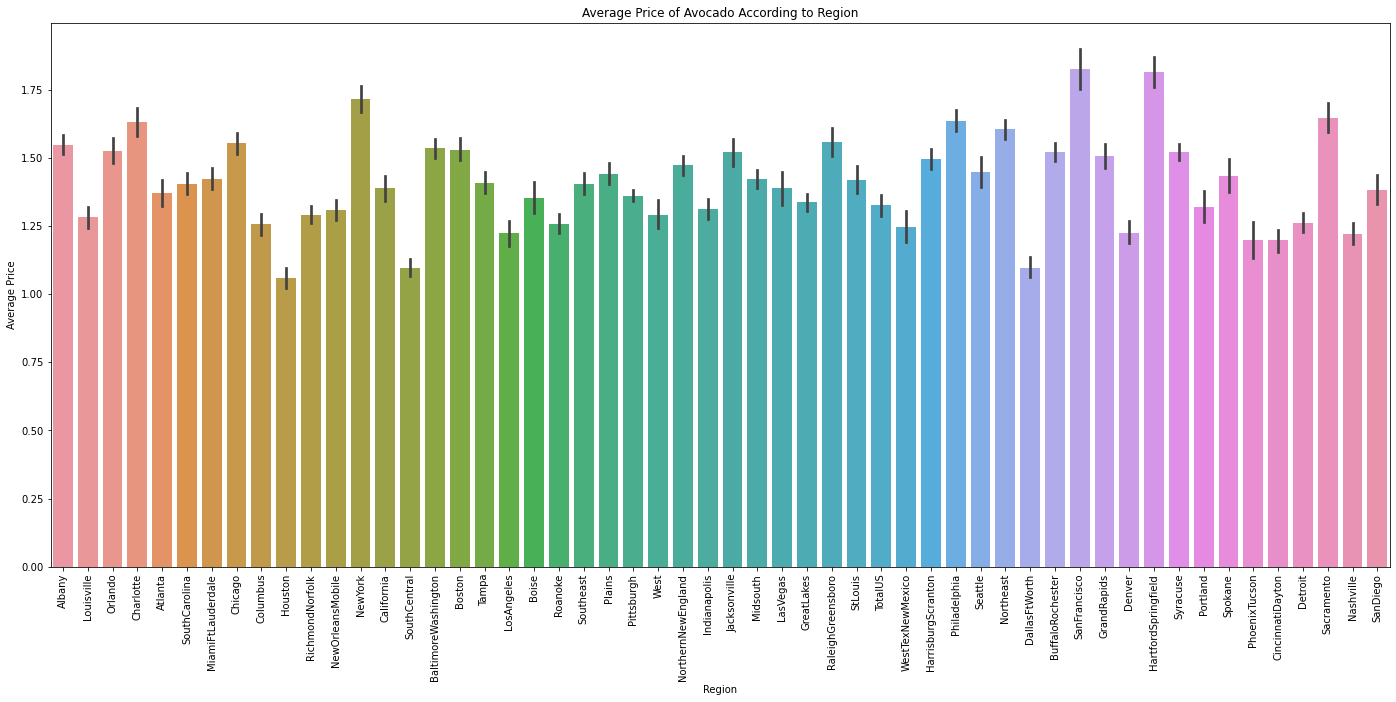

In [22]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='AveragePrice', data = train_data)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

**Average Total Volume based on Region**

Text(0.5, 1.0, 'Average Total Volume of Avocado According to Region')

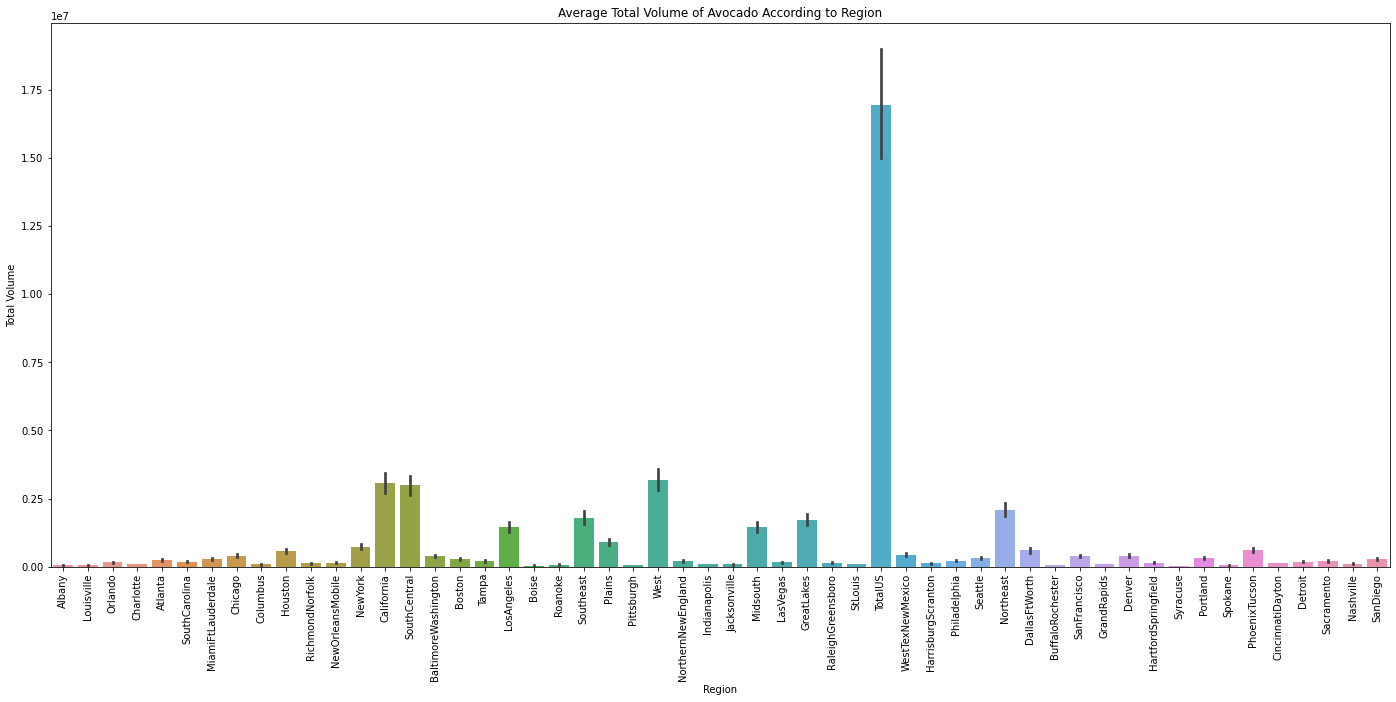

In [23]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='Total Volume', data = train_data)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Average Total Volume of Avocado According to Region')

**Price Distribution based on date column**

Text(0.5, 1.0, 'Average Price')

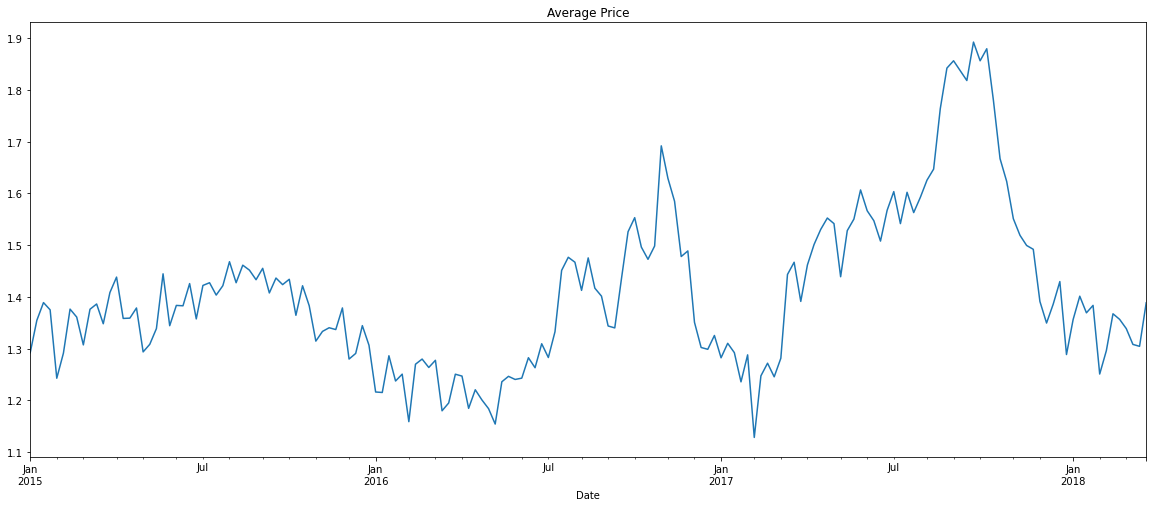

In [24]:
byDate=train_data.groupby('Date').mean()
plt.figure(figsize=(20,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

**Data Showing corelation with each other**

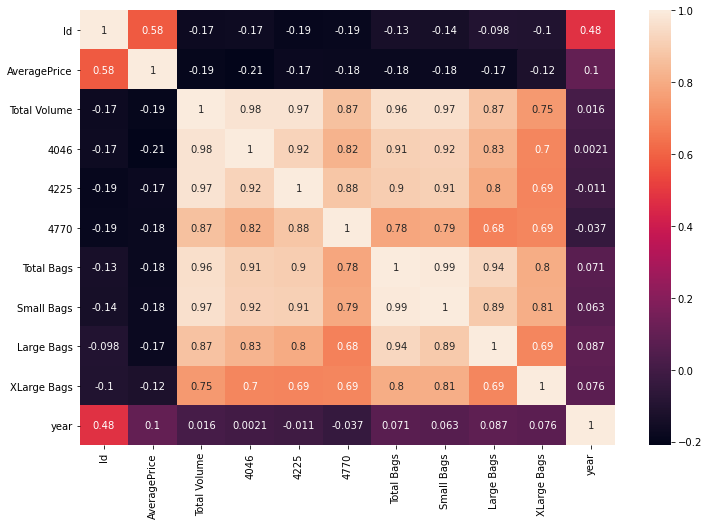

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [26]:
train_data_final = pd.get_dummies(train_data.drop(['region','Date'],axis=1),drop_first=True)


In [27]:
train_data_final.head(10)

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,14761,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.00,2017,1
1,6843,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.00,2017,0
2,7306,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.00,2017,0
3,12329,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.00,2016,1
4,12036,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.00,2016,1
5,7994,1.14,331446.60,150107.10,76620.67,2862.33,101856.50,78346.11,22320.39,1190.00,2017,0
6,6904,1.84,409206.24,278164.17,53156.30,50.37,77835.40,16642.51,61152.89,40.00,2017,0
7,3235,1.80,523682.50,52200.02,324240.53,75841.97,71399.98,61522.13,1047.85,8830.00,2016,0
8,522,1.03,117393.22,57557.75,23198.49,16370.50,20266.48,11760.83,4248.29,4257.36,2015,0
9,944,0.75,983909.85,427828.16,411365.91,20404.29,124311.49,56573.89,67737.60,0.00,2015,0


---
<a name = Section7></a>
# **7. Building a Model**

**Since the target variable is continous, we will apply linear regression**

In [28]:
#Splitting the train data set into training and testing.

X = train_data_final.drop(columns = "AveragePrice", axis = 1)
y = train_data["AveragePrice"]

 - **Splitting 80/20 ratio**

In [29]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(14599, 11) (11679, 11) (2920, 11)


In [31]:
#Using Linear Regression
linreg = LinearRegression()


In [32]:
linreg.fit(X_train, y_train) 

LinearRegression()

In [57]:
# Prediction on training data
train_data_predict1 = linreg.predict(X_train)

In [58]:
#Finding the R2
r2_train = metrics.r2_score(y_train,train_data_predict1)
print("R Squared Value:", r2_train)

R Squared Value: 0.4065121720867332


In [59]:
#Prediction on testing data
test_data_predict1 = linreg.predict(X_test)

In [60]:
#Finding the R2
r2_test = metrics.r2_score(y_test,test_data_predict1)
print("R Squared Value:", r2_test)

R Squared Value: 0.41851105337252215


In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, train_data_predict1))
print('MSE:', metrics.mean_squared_error(y_train, train_data_predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_data_predict1)))

MAE: 0.2398772082391906
MSE: 0.09742061904739086
RMSE: 0.3121227627831569


In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, test_data_predict1))
print('MSE:', metrics.mean_squared_error(y_test, test_data_predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_data_predict1)))

MAE: 0.23409451067113551
MSE: 0.09381279197792229
RMSE: 0.306288739554562


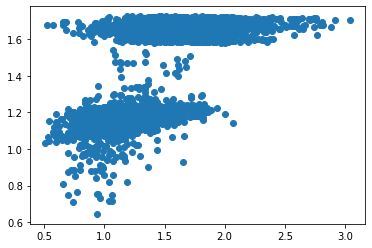

In [64]:
plt.scatter(x=y_test,y=test_data_predict1)


**As we can see that there is no straight line so it is not a best model we can apply on our data.**

**2. Decision Tree**

In [65]:
from sklearn.tree import DecisionTreeRegressor
dectree=DecisionTreeRegressor()
dectree.fit(X_train,y_train)
test_data_predict2=dectree.predict(X_test)

In [66]:
train_data_predict2 = dectree.predict(X_train)

Text(0, 0.5, 'Predicted Y')

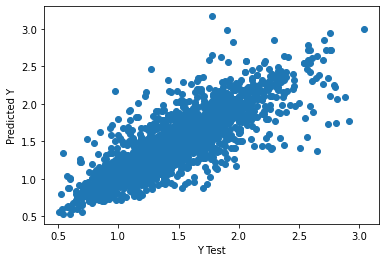

In [67]:
plt.scatter(x=y_test,y=test_data_predict2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
#Checking RMSE for Decision tree Algorithm
#For testing data
print('MAE:', metrics.mean_absolute_error(y_test, test_data_predict2))
print('MSE:', metrics.mean_squared_error(y_test, test_data_predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_data_predict2)))

MAE: 0.13856164383561642
MSE: 0.045473493150684934
RMSE: 0.21324514801205896


In [69]:
#For training data
print('MAE:', metrics.mean_absolute_error(y_train, train_data_predict2))
print('MSE:', metrics.mean_squared_error(y_train, train_data_predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_data_predict2)))

MAE: 3.9925821589396843e-19
MSE: 8.232076618187414e-35
RMSE: 9.073079200683423e-18


**3. Random forest**

In [70]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)
test_data_predict3=randomforest.predict(X_test)

In [71]:
train_data_predict3=randomforest.predict(X_train)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, test_data_predict3))
print('MSE:', metrics.mean_squared_error(y_test, test_data_predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_data_predict3)))

MAE: 0.1044110616438356
MSE: 0.022774874811643822
RMSE: 0.15091346795976768


In [73]:
print('MAE:', metrics.mean_absolute_error(y_train, train_data_predict3))
print('MSE:', metrics.mean_squared_error(y_train, train_data_predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_data_predict3)))

MAE: 0.040245954276907255
MSE: 0.003428475642606385
RMSE: 0.05855318644280928


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

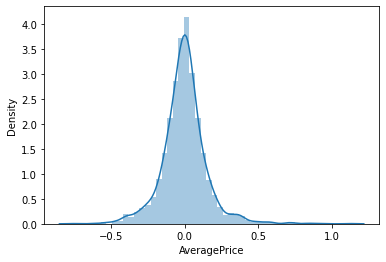

In [74]:
sns.distplot((y_test-test_data_predict3),bins=50)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

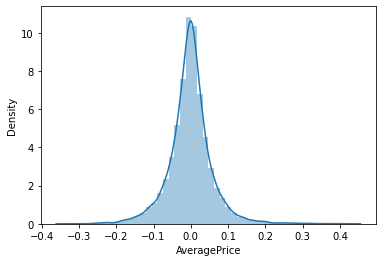

In [75]:
sns.distplot((y_train-train_data_predict3),bins=50)


Text(0, 0.5, 'Predicted Y')

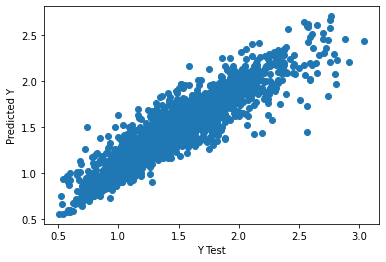

In [76]:
plt.scatter(x=y_test,y=test_data_predict3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [56]:
test_data = pd.read_csv('C:/Users/zoher/Desktop/Term 5/Project/AVACADO PRICE PREDICTION/avocado_test.csv')
test_data

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,15250,2017-05-28,12161.37,325.70,4912.89,0.00,6922.78,975.95,5946.83,0.00,organic,2017,CincinnatiDayton
3646,2157,2015-07-12,490312.63,251056.27,182844.55,14524.67,41887.14,38417.55,3469.59,0.00,conventional,2015,SanDiego
3647,2029,2015-12-27,98584.92,33255.50,31680.16,152.86,33496.40,32877.16,0.00,619.24,conventional,2015,Roanoke
3648,11493,2015-06-28,55512.87,37684.23,5875.04,0.00,11953.60,11251.56,702.04,0.00,organic,2015,SouthCentral


In [80]:
test_data_final = pd.get_dummies(test_data.drop(['region','Date'],axis=1),drop_first=True)


In [81]:
test_data_final

,Id,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,11137,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,2015,1
1,16503,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,2017,1
2,6438,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,2017,0
3,8247,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,2017,0
4,10481,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,2015,1
...,...,...,...,...,...,...,...,...,...,...,...
3645,15250,12161.37,325.70,4912.89,0.00,6922.78,975.95,5946.83,0.00,2017,1
3646,2157,490312.63,251056.27,182844.55,14524.67,41887.14,38417.55,3469.59,0.00,2015,0
3647,2029,98584.92,33255.50,31680.16,152.86,33496.40,32877.16,0.00,619.24,2015,0
3648,11493,55512.87,37684.23,5875.04,0.00,11953.60,11251.56,702.04,0.00,2015,1


In [82]:
prediction = randomforest.predict(test_data_final)

In [84]:
res = pd.DataFrame(prediction)
res.index = test_data_final.index
res.index = test_data_final['Id']
res.columns = ["AveragePrice"]
res.to_csv("Avocado_price_prediction_zoherbehrainwala@gmail.com.csv", index = False, header = False)

---
<a name = Section9></a>
# **8. Summarization**
---

<a name = Section91></a>
### **8.1 Conclusion**

 - We studied in breifly about the data, its characteristics and its distribution.

 - We investigated about the AveragePrice of for the Avocado.
 
 - The prediction is done based on RMSE value as required.

 - Since the data here is continous we used 3 models. 1) Linear Regression model, 2) Decision Tree and 3) Random Forest for this dataset. We found that the Random forest is the best fit model for this dataset.